In [2]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import random
npx.set_np()

In [3]:
# Saved in the d2l package for later use
def synthetic_data(w, b, num_examples):
    """Generate y = X w + b + noise."""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [8]:
features[:,0].mean()


array(-0.06688478)

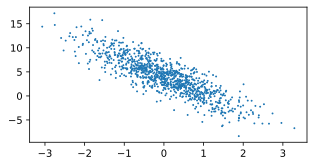

In [15]:
d2l.set_figsize((5, 2.5))
d2l.plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(),1);

In [16]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [17]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[[ 1.2402921  -0.47070333]
 [ 0.3266078  -0.19628286]
 [-1.5042754  -1.8585167 ]
 [-0.32546774  0.03745479]
 [-0.1471441   0.3530864 ]
 [ 0.71263075 -0.17182696]
 [ 1.360035    0.68185794]
 [ 0.99884963 -1.3147384 ]
 [-0.70443887  0.11922956]
 [ 0.5080506  -0.33354786]] 
 [ 8.289535   5.5017343  7.5117297  3.4248264  2.694822   6.214759
  4.594172  10.657715   2.3863978  6.3651752]


In [18]:
w = np.random.normal(0,0.01, (2,1))

In [19]:
b = np.zeros(1)

In [20]:
w.attach_grad()
b.attach_grad()

In [21]:
# Saved in the d2l package for later use
def linreg(X, w, b):
    return np.dot(X, w) + b

In [22]:
# Saved in the d2l package for later use
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [23]:
# Saved in the d2l package for later use
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [26]:
lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training dataset are used once in one epoch
    # iteration. The features and tags of minibatch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w, b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

[[3.9725451e-06]
 [6.8179259e-05]
 [2.9911270e-04]
 [4.8028927e-05]
 [1.2049330e-05]
 [1.7484730e-04]
 [5.2367986e-06]
 [7.9595746e-05]
 [1.1298489e-04]
 [1.5119202e-05]]
[[1.2157907e-04]
 [2.3247416e-05]
 [3.4427794e-06]
 [1.7142398e-05]
 [2.1845499e-05]
 [1.2665626e-05]
 [1.3547268e-04]
 [8.5674128e-06]
 [6.4242638e-05]
 [5.8499139e-05]]
[[1.9062623e-05]
 [6.3948846e-06]
 [6.8998693e-06]
 [1.7674152e-05]
 [5.0406037e-05]
 [2.2730901e-06]
 [8.4171927e-07]
 [2.1208805e-05]
 [1.8445558e-04]
 [3.5147637e-05]]
[[1.0141778e-07]
 [1.0564872e-07]
 [1.7749360e-05]
 [1.8337994e-05]
 [4.2302872e-06]
 [1.6976674e-07]
 [1.1769210e-04]
 [4.7091471e-06]
 [8.7824119e-06]
 [2.1443212e-04]]
[[2.38219509e-05]
 [5.40008659e-06]
 [1.17144054e-08]
 [2.50653567e-04]
 [2.13316525e-05]
 [2.52574046e-05]
 [3.35982768e-04]
 [7.88292346e-06]
 [3.59430938e-04]
 [6.67116838e-05]]
[[3.2778233e-05]
 [2.5724694e-05]
 [5.8710797e-05]
 [4.5252182e-05]
 [7.1031536e-05]
 [2.1179312e-05]
 [2.4573274e-05]
 [1.3080040e-04]

 [2.2999751e-05]]
[[6.65300468e-05]
 [2.97557744e-06]
 [1.26873856e-04]
 [1.39720441e-05]
 [7.55902001e-05]
 [1.47753899e-05]
 [4.84956537e-08]
 [1.04740211e-04]
 [1.12669724e-04]
 [8.40950088e-06]]
[[1.0516400e-04]
 [2.3680634e-05]
 [6.2524414e-06]
 [9.6224539e-08]
 [4.1157673e-05]
 [2.0040572e-05]
 [1.8026553e-06]
 [2.6874503e-05]
 [7.7274972e-06]
 [4.2316742e-06]]
[[1.6976864e-04]
 [6.6497596e-06]
 [6.0627674e-05]
 [7.9948091e-05]
 [3.0222891e-06]
 [8.6038210e-07]
 [6.1825449e-05]
 [6.6216897e-05]
 [2.4560795e-06]
 [4.0980489e-05]]
[[3.47529603e-05]
 [8.89971034e-06]
 [6.53031293e-06]
 [9.58066266e-08]
 [3.46831279e-04]
 [5.95612546e-05]
 [6.23035812e-05]
 [8.81892174e-06]
 [1.32211717e-05]
 [1.10412075e-04]]
[[7.3467534e-05]
 [5.1627023e-07]
 [1.8413403e-04]
 [1.3707379e-05]
 [7.7040822e-06]
 [1.6658649e-05]
 [2.7325185e-04]
 [2.3247821e-07]
 [6.0895756e-05]
 [7.8797588e-05]]
[[5.3735246e-05]
 [2.0454761e-05]
 [2.5264182e-05]
 [2.9293313e-05]
 [1.1978041e-05]
 [3.8514921e-05]
 [8.2

 [1.0641727e-05]]
[[1.81535324e-06]
 [6.21960362e-06]
 [1.31574961e-05]
 [3.81558493e-07]
 [2.03527179e-05]
 [6.98070107e-06]
 [8.95256380e-05]
 [1.16662835e-04]
 [2.31893318e-05]
 [4.39104515e-05]]
[[8.6269800e-05]
 [6.8530080e-06]
 [4.7544120e-07]
 [9.7838994e-05]
 [1.0472986e-04]
 [5.0438784e-06]
 [1.1170369e-04]
 [1.4557946e-04]
 [1.7442177e-04]
 [4.6542769e-05]]
[[7.5597054e-06]
 [9.8878309e-06]
 [1.4568104e-07]
 [7.1600080e-06]
 [6.4873864e-05]
 [3.0227582e-04]
 [7.9263316e-07]
 [2.9052921e-05]
 [8.7779583e-05]
 [8.8057794e-05]]
[[6.02790024e-05]
 [2.09020818e-05]
 [3.34554061e-05]
 [2.12662981e-05]
 [1.06351290e-05]
 [3.72449449e-09]
 [6.28370035e-05]
 [1.20614364e-04]
 [3.08650124e-05]
 [2.55076884e-06]]
[[7.2966632e-06]
 [2.3074195e-05]
 [6.7580118e-08]
 [1.5757825e-04]
 [5.6422567e-05]
 [5.2992629e-05]
 [2.1997050e-07]
 [6.5336360e-05]
 [1.8671590e-05]
 [2.7611435e-05]]
[[1.2133746e-05]
 [3.5111665e-05]
 [7.5287833e-05]
 [2.0067750e-05]
 [3.2593180e-05]
 [2.1981239e-05]
 [4.7

 [1.0574678e-04]]
[[1.3382265e-05]
 [1.3445425e-06]
 [4.9408005e-05]
 [1.2047000e-06]
 [8.7021590e-06]
 [3.0882077e-04]
 [4.4125159e-08]
 [1.0842854e-05]
 [5.7724832e-05]
 [2.0587505e-04]]
[[2.3020777e-05]
 [5.6337012e-06]
 [1.4931814e-05]
 [3.0510796e-06]
 [4.8130245e-05]
 [8.8806089e-05]
 [2.3774252e-05]
 [2.6019115e-06]
 [1.6025214e-04]
 [2.0500574e-06]]
[[1.2648832e-05]
 [3.6463040e-05]
 [4.5392917e-05]
 [1.6532282e-05]
 [2.5736666e-05]
 [3.5474222e-05]
 [1.7365447e-04]
 [2.0052885e-05]
 [6.3608240e-06]
 [1.4859103e-05]]
[[8.1027996e-05]
 [2.2368379e-04]
 [2.5278266e-04]
 [4.4633736e-04]
 [2.3040134e-06]
 [1.7809912e-06]
 [3.9039605e-06]
 [8.0112422e-06]
 [1.8842442e-05]
 [3.1418551e-06]]
[[7.7584582e-06]
 [3.1961041e-05]
 [1.4640262e-05]
 [1.0842854e-05]
 [2.2411728e-05]
 [2.5832545e-05]
 [1.5962843e-05]
 [3.4713215e-05]
 [1.7718123e-05]
 [1.5255675e-04]]
[[1.1891700e-04]
 [2.3536464e-05]
 [7.0593160e-08]
 [1.8726994e-05]
 [1.9527673e-05]
 [9.6203621e-06]
 [4.7663916e-06]
 [1.8098

 [1.3003414e-06]]
[[5.17273111e-05]
 [3.76255630e-05]
 [3.65557353e-05]
 [1.19919205e-04]
 [4.95645509e-07]
 [9.11665120e-05]
 [9.45583452e-08]
 [3.89471861e-05]
 [2.02463780e-05]
 [7.86400142e-06]]
[[8.0764163e-05]
 [5.9983552e-07]
 [1.6270107e-05]
 [6.7759516e-05]
 [3.5140143e-05]
 [3.6328787e-05]
 [7.5862343e-05]
 [2.3473985e-06]
 [2.0346633e-05]
 [2.9171235e-06]]
[[4.5930617e-05]
 [8.9324312e-06]
 [4.1787371e-05]
 [2.8431099e-05]
 [3.5311743e-05]
 [1.2611541e-04]
 [3.2176104e-06]
 [2.2698361e-05]
 [3.9453744e-06]
 [6.2490020e-05]]
[[2.7738065e-06]
 [2.7560520e-05]
 [9.6748208e-06]
 [3.3974218e-05]
 [2.7163685e-05]
 [4.7737558e-06]
 [4.4804197e-05]
 [2.6197131e-07]
 [1.9552361e-04]
 [1.9204094e-06]]
[[1.49638981e-06]
 [4.48023638e-06]
 [1.03975544e-04]
 [1.27356645e-06]
 [1.98638190e-06]
 [3.31266274e-05]
 [1.24684419e-04]
 [6.06224203e-05]
 [1.44884234e-05]
 [8.97650680e-05]]
[[1.8443548e-05]
 [1.5875399e-05]
 [1.2450553e-07]
 [1.2037628e-07]
 [3.5837058e-06]
 [6.2558142e-06]
 [6.7

In [25]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w [ 0.00107729 -0.00063539]
Error in estimating b [0.00089931]
